# Digitre

#### December 2016

In [33]:
# Standard library
import datetime

# Third party libraries
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import helpers as helpers

In [102]:
import imp
imp.reload(helpers)

<module 'helpers' from '/Users/luis/Git/digitre/digitre/helpers.py'>

In [103]:
# Latest update
str(datetime.datetime.now())

'2016-12-14 19:58:04.302966'

In [104]:
b64_img_str = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAMgAAADICAYAAACtWK6eAAAMHklEQVR4Xu2du8s+RxXHT0pRvGAlEbxhOq9FUBQvhZ1BA6m0UP8CL1W6aKOFhfoXaBDSBbVVMCYYkCAkES0UUSOKiEU02FlEvrqD6zD7PDPn2fM+z575LLz8yPvOzO75nP1kZnZnd+8xNghAYJPAPbCBAAS2CSAIZwcEThBAEE4PCCAI5wAEfAToQXzcqDUJAQSZJNGE6SOAID5u1JqEAIJMkmjC9BFAEB83ak1CAEEmSTRh+gggiI8btSYhgCCTJJowfQQQxMeNWpMQQJBJEk2YPgII4uNGrUkIIMgkiSZMHwEE8XGj1iQEEGSSRBOmjwCC+LhRaxICCDJJognTRwBBfNyoNQkBBJkk0YTpI4AgPm7UmoQAgkySaML0EUAQHzdqTUIAQSZJNGH6CCCIjxu1JiGAIJMkmjB9BBDEx41akxBAkEkSTZg+Agji40atSQggyCSJJkwfAQTxcaPWJAQQZJJEE6aPAIL4uFFrEgIIMkmiCdNHAEF83Kg1CQEEmSTRhOkjgCA+btSahACCTJJowvQRQBAfN2pNQgBBJkk0YfoIIIiPG7UmIYAgkySaMH0EEMTHjVqTEECQSRJNmD4CCOLjRq1JCCDIJIkmTB8BBPFxo9YkBBBkkkQTpo8Agvi4UWsSAggySaIJ00cAQXzcqDUJAQSZJNGE6SOAID5u1JqEAIJMkmjC9BFAEB83ak1CAEEmSTRh+gggiI8btSYhgCCTJJowfQQQxMeNWpMQQJBJEk2YPgII4uNGrUkIIMgkiSZMHwEE8XGj1iQEEGSSRBOmjwCC+LjVtb68/OJlM/uHmb2mKiDOL5rZc8vvXzCzP+yza1qJJIAg+9CVGGV70sw+3NnsTxZRnjazn68E6qxOsWgCCLIPYa8gZe/Pm9m7FlkkzffNTKL9fZ/DoxUvAQTxkjPTsOqRRvWRHqRUf8nMXt1o6ztm9qiZSRq2KxBAED/0j5iZfrStRRkV5M9mdu+Zw9Dc5ZuLLP4jpuYwAQQZRtasUCbp+qOGRa9tlNLv3r38fj1HecbM7u88DLUtUb7F8KuT2IXFEORCgBdUf7OZ6UfSfHJgYq/5ypvsv0M8icIWSABBAuEONq0eRkM2yaJ/JUFrKxN6/U1Dry8yRxkkPVAcQQZg3XHRz5qZftbDsbUc68PRZF6icNVr5yQhyM5AA5rTEOwLZvYZM9sSpMx9PrdcIg44jDmbRJDj5F1DME3QJcqpTTIxN9kprwiyE8jgZtSLaF4iQcq/urG4tWnIpd6E7UICCHIhwODq6jW+t0ih+yvlvot2q55CV7LqdV/lkHRz8UHmJZdlCEEu4xdZW1ezvr26p1ILon1LIPUWn9g4EF3l0pDsF5EHmrltBLnN7Kp3+EZ1aC1BShENvT7fCEWLIF9pZh+lJ/ElGkF83KJqqUeQGBoa/dXM7lvt6JQgKqZLwupxyiY5PrD8h4ZbkoRtkACCDAILLC45nlgtR9FzJcpPWcT4uJk9dGb/msxLhl+u5ChVdGVLPRPbAAEEGYAVWFQntuSo13D92szesEzUdXL33Ah8p5k9tTF515UtzVnYOgkgSCeowGL1ZLzele6Qa44xsulql4Rrbe/hwax+lAjSzyqiZD1vWO9DQyz1Gt7/42+1zXxkIJMIMgBr56I68d9fTcTLLiSHeoHyDLt319pH6867Juw8hNVBFUE6IAUUKSeuRKivVmm9leTomW/0HJpEqJ+RpxfpIbdcJeksSrEdCNRXqtRkmYjratUPlsu1e8mh9rfmI/QiHQmlB+mAtFORlhylaUnys0WOnXb3f820epHHzOzTETvL1CaC3E02T8mhI4i+/Fp6kd+Y2V/M7G1m9kYzewvv5zp9AiBIvCDXlqNE+EMz+1gVbrSY8XSD94AgsYB1A1DLP8rLGtZ70wRd90Du6mpSa72W5jw6BrYNAggSd2qcuqO912XckaNvTdZ1MeB1I43MVhZBYjJelo5oTdQHq11cQ45yCBKifn6Eq1knzgEE2V+Qes7x05Uk15RDkeqVpvWzI56lLPtTu9EWEWTfxGxNyCXJO3a6O37JEbdel8oqX3qQS86p7rqnrlap5/jQDTzZpwm5HuFdb+eeM+kGkLEgPcg+WT0nxx7rqvY4Ur3J8ferhvRe4L+ZmVb4sjUIIMg+p4UWFbbeMnLtOUcrOh3r65cbheXvnAcb5wFgLhdka8XsLcqhaPVlq/q1pjwjgiCXm9Bo4WhyKITWuiwu9SLI7oLogaSHl0di64/f3PIJhyADpwJDrAFYq6LrZ8i1ElccyxtIbn19U2vJyVeWl9D5aCSuhSDjydUVq2eXb3uU2uXBp69d8Ijs+JH4arTuhSAIQyzf2dSo1bobrWL6lqCGXbe+IchAhuhBBmAtK1/rG21qQY/JtlbsjrV+N6URZIAzgvTDag2tVFvDK8mhy6dH2BBkIEsI0g9r67PPek2ohl1H2RBkIFMI0gdLvYeGUb8zs/euXgd6xHVMCNKX8/+UQpA+WOuXsGlIpatYEkXLS44ytCqRtm5uHq0X7MvaDqUQpA9ia3nGUa5a1RFyo7Av5/QgnZw0AVePUW9HfSMIa7E6E88Qqw/U6Mds+lq9Tiktd9dqXi151+O3r1hW9eoVQGwNAgyxzp8WmR5Tbcl+pHs457O1cwkEOQ/0x2Z2b/WS6SMuD9+6j8Mz6SfOAQQ5LYhOqhdXRbQwUUOT95336uZKtHoPHeRR51J3AhhBTmNuvUvqiPc+ymVqzT/eurqPw4vjzmiGIKcBtV5ycLSTql7ervs4upKlCfuRlsjcSY9R7wRBTmM/8l1n9X5fMrMHNkJk7tGhHILkE0RiPLK8g+tP1csZSrRHvcnZcUrvWwRBcgiiiwl6Y6J6PA2d1pvmTOsvTCHHgEMIcmxBNEeSGG9vfBe9RKY5xz/N7FUXfhR04LTKUxRBjieIJtb6MKfkKL3F0ycEUYT6mtTXd/goaJ4zvzMSBDkNSvcO6pc96yrW6HfLO9OxWaz0FJpf1EMoVVIvoVzWb1d5YXkM+K6+QXJpnDdXH0HGL/P+yMy+GvzhG/USmjdICH2uQK8ROretexHNO7Ss3fuN9XP7mubvCHI61fW7bNcnoUT51fI0odYzeb9Mq33oTYeSQWLoZ91LPGNm93eckTq23y4T9aM9o9IR3nWKIMh57uVG21oOfQyzvAdLLegl0P9absDp5FyfoGL88mo3EkGbJNDQqPVO3/NH9b8SGvKppzjSY78j8V21LIKcx69LqN81s4+vij61fM6g/Kr3//L13rbuU9Tl6vYlhYTQj7fnOh85JXjktvMckCQ6Gcv9BPUYWuFbtvpeQ2ez3cWeMLM/LsegCTdSdKO7rCA9yBg/LfrTp5Q/VVXTHMQ7VKplW0snGSSmFhmyXYEAgviga/6guUSZWGvJeH2JtbflMsGXBJq76F8uy/bSCy6HIPsB1tUnDcUkT+teRdlTOfk1TKJn2I9/SEsIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAIIEoKVRrMQQJAsmSSOEAL/BtBnYthns8uuAAAAAElFTkSuQmCC"
digit = helpers.b64_str_to_np(b64_img_str)

Dimensions of numpy ndarray:  (200, 200, 4)


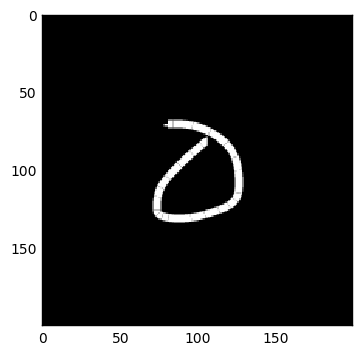

In [105]:
plt.imshow(digit, cmap = 'gray', interpolation = 'none')

In [106]:
digit = helpers.crop_img(digit)

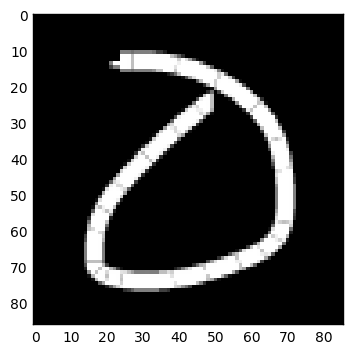

In [107]:
plt.imshow(digit, cmap = 'gray', interpolation = 'none')

In [108]:
digit = helpers.resize_img(digit)

In [109]:
digit.shape

(28, 28)

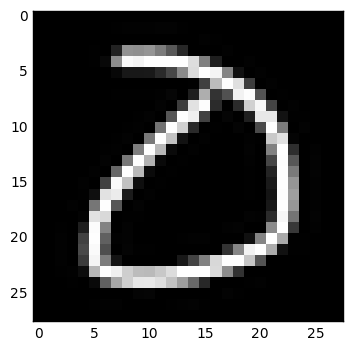

In [110]:
plt.imshow(digit, cmap = 'gray', interpolation = 'none')